# KNN(K-Nearest Neighbors)
The K-Nearest Neighbor (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of classification, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point. For regression, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point.

The KNN algorithm is straightforward and easy to understand, making it a popular choice in various domains. However, its performance can be affected by the choice of K and the distance metric, so careful parameter tuning is necessary for optimal results.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('glass.csv')

In [5]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [6]:
df.tail()

RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7

In [7]:
df.shape

(214, 10)

In [9]:
df[df.duplicated()].shape

(1, 10)

In [10]:
df[df.duplicated()].sum()

RI       1.52213
Na      14.21000
Mg       3.82000
Al       0.47000
Si      71.77000
K        0.11000
Ca       9.57000
Ba       0.00000
Fe       0.00000
Type     1.00000
dtype: float64

In [11]:
df[df.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [15]:
df1=df.drop_duplicates()
df1

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[213 rows x 10 columns]

In [16]:
df1.shape

(213, 10)

In [19]:
df1.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [21]:
df1.describe()

RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518348   13.404085    2.679202    1.449484   72.655070    0.498873   
std      0.003033    0.816662    1.443691    0.495925    0.773998    0.653185   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.810000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  213.000000  213.000000  213.000000  213.000000  
mean     8.954085    0.175869    0.057277    2.788732  
std      1.425882    0.498245    0.097589    2.105130  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.150000    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [22]:
corr=df1.corr()

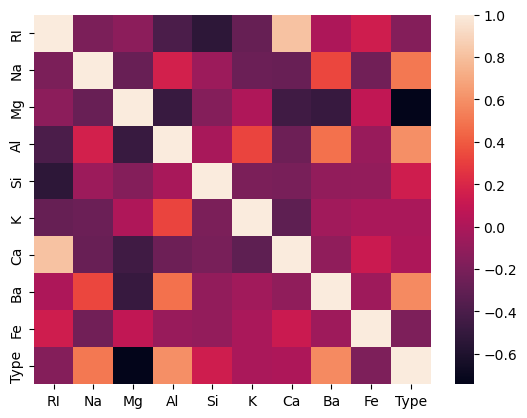

In [23]:
# Correlation Heatmap.
sns.heatmap(corr)
plt.show()

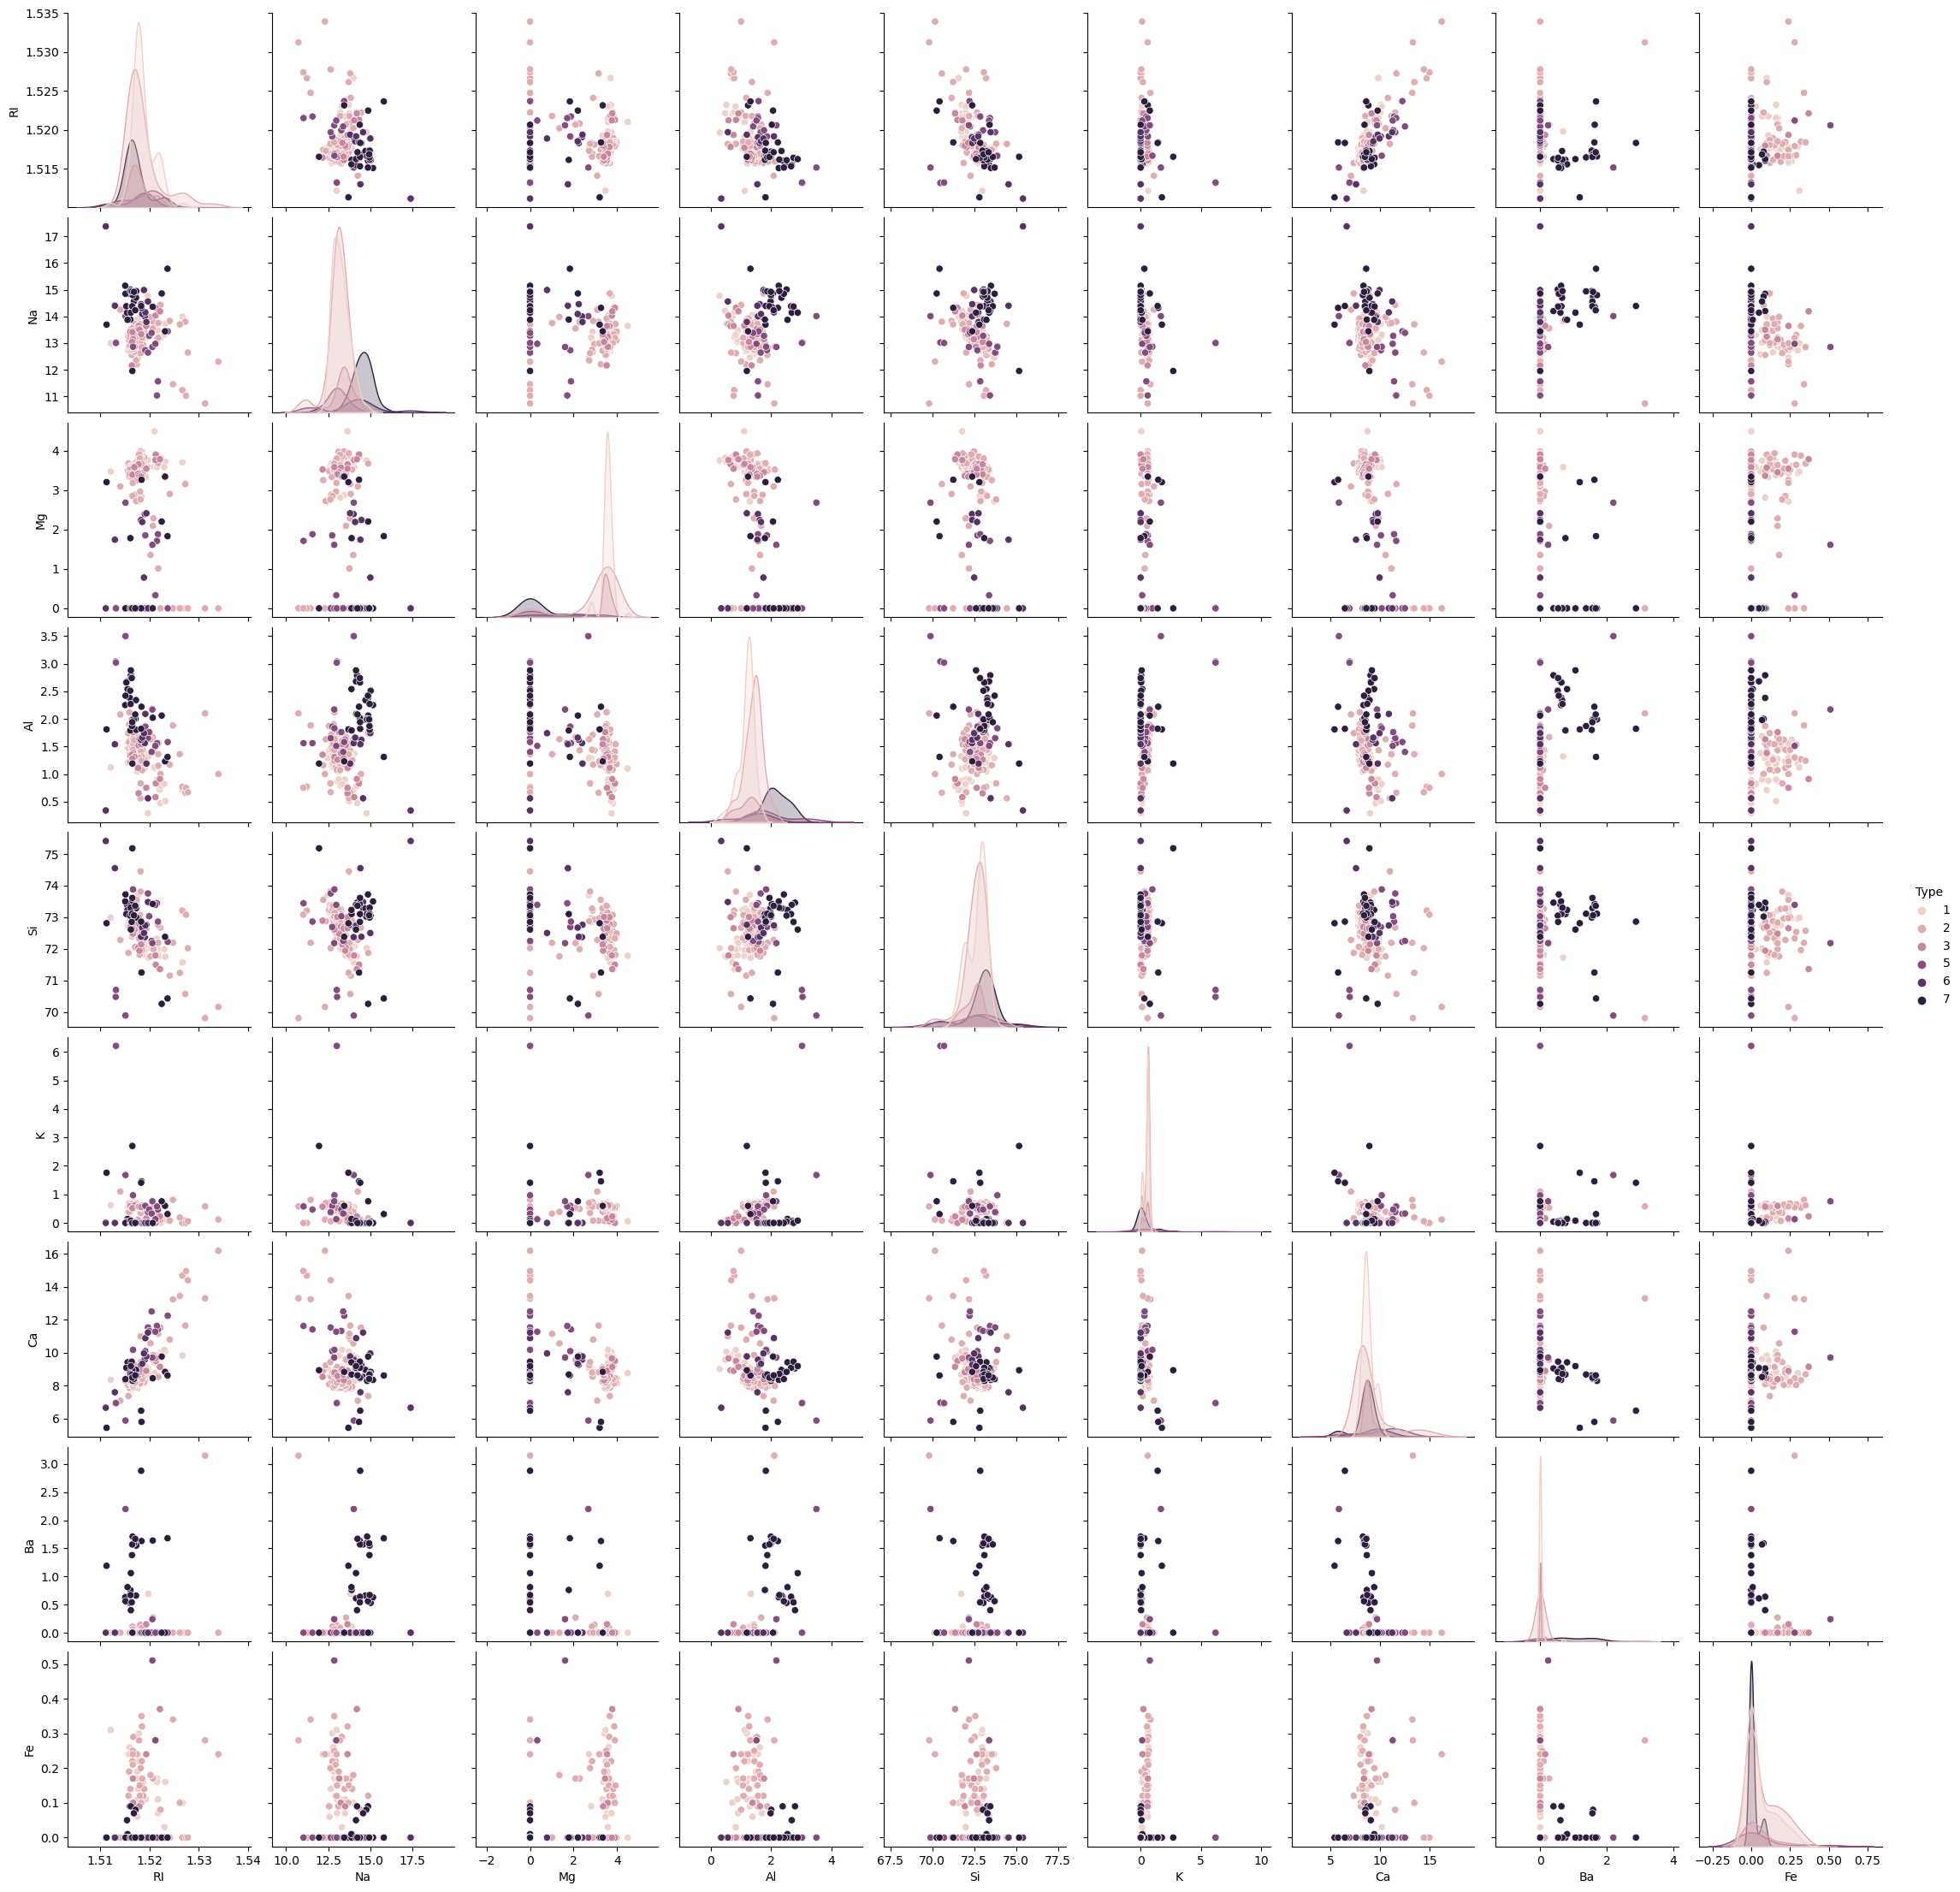

In [24]:
sns.pairplot(df1,hue='Type')
plt.show()

In [25]:
# Dividing The Give Dataset into X and Y.
DF=df1.iloc[:,0:9]


In [26]:
array=DF.values

In [27]:
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(array)

In [30]:
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [31]:
df_knn = pd.DataFrame(x,columns=df1.columns[:-1])
df_knn

RI        Na        Mg        Al        Si         K        Ca  \
0    0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1   -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2   -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3   -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4   -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.699888  0.903249 -1.860172  2.891336 -0.058368 -0.642789  0.158812   
209 -0.494986  1.860605 -1.860172  1.092483  0.524398 -0.765554 -0.389506   
210  0.760865  1.173272 -1.860172  1.153118  0.990612 -0.765554 -0.361387   
211 -0.607351  1.197820 -1.860172  0.991424  1.236668 -0.765554 -0.333268   
212 -0.409059  1.013713 -1.860172  1.274389  0.912909 -0.765554 -0.234852   

           Ba        Fe  
0   -0.353808 -0.588301  
1   -0.353808 -0.588301  
2   -0.353808 -0.588301  
3   -0.353808 -0.588301  
4   -0.353808 -0.588301  
..        ...       ...  
208  1.778672 -0.588301  
209  2.844912 -0.588301  
210  2.945501 -0.588301  
211  2.804676 -0.588301  
212  3.005854 -0.588301  

[213 rows x 9 columns]

In [33]:
X=df_knn
y=df1['Type']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [37]:
x_train

RI        Na        Mg        Al        Si         K        Ca  \
185  0.010659  1.124177  0.403249  1.557355 -1.819617  1.474913 -2.224265   
202 -0.584217  1.713320 -1.860172  1.092483  0.589150 -0.765554 -0.473863   
210  0.760865  1.173272 -1.860172  1.153118  0.990612 -0.765554 -0.361387   
72  -0.673449 -0.078656  0.618482  0.243586  0.278342  0.170531 -0.748022   
58  -0.266950 -0.017287  0.680969 -0.524464  0.174739  0.109149 -0.480893   
..        ...       ...       ...       ...       ...       ...       ...   
32  -0.197547 -0.680073  0.555995 -0.443617  0.407845  0.170531 -0.277031   
124  0.123025 -0.581882  0.680969  0.223374 -0.187871  0.124494 -0.284060   
131 -0.071962  0.031808  0.903145 -0.544676 -0.213772  0.124494 -0.565249   
158 -0.128145  0.117725  0.472679  0.364857 -0.926042  0.109149 -0.101287   
203 -0.719717  1.897427 -1.860172  1.658414  0.835207 -0.765554 -0.171585   

           Ba        Fe  
185  2.925383 -0.588301  
202  3.086325 -0.588301  
210  2.945501 -0.588301  
72  -0.353808 -0.588301  
58  -0.353808  0.541526  
..        ...       ...  
32  -0.172748  1.671354  
124 -0.353808  0.644238  
131 -0.353808 -0.588301  
158 -0.353808  0.336103  
203  0.994080 -0.588301  

[149 rows x 9 columns]

In [38]:
x_test

RI        Na        Mg        Al        Si         K        Ca  \
83  -1.407130  1.038260  0.285217  1.274389 -0.485730  0.922469 -1.317430   
62   1.296254  0.940070  0.785114 -1.353149 -1.690113 -0.765554  0.517328   
84  -0.693278 -0.054108  0.625425  0.081891  0.084086 -0.074999 -0.523071   
137 -0.531339 -0.753716  0.583767  0.182950  0.912909  0.247260 -0.740993   
187  1.362351  1.786963 -0.332710  1.233966 -3.101703  0.400716  0.566537   
..        ...       ...       ...       ...       ...       ...       ...   
115 -0.019084 -0.201394  0.847601 -0.079804 -0.420978  0.078457 -0.452774   
4   -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   
28  -0.220682 -1.036013  0.583767 -0.039380  0.640952  0.109149 -0.291090   
113  0.040403 -0.373227  0.896202 -0.524464 -0.278524  0.155186 -0.368417   
125 -0.554473 -0.569608  0.646254 -0.382981  0.122937  0.093803 -0.248912   

           Ba        Fe  
83  -0.353808 -0.588301  
62  -0.353808 -0.588301  
84  -0.353808 -0.588301  
137 -0.353808 -0.588301  
187 -0.353808 -0.588301  
..        ...       ...  
115 -0.353808  0.438815  
4   -0.353808 -0.588301  
28  -0.353808 -0.588301  
113 -0.353808 -0.588301  
125 -0.353808 -0.588301  

[64 rows x 9 columns]

In [39]:
y_train

186    7
203    7
211    7
73     2
59     1
      ..
32     1
125    2
132    2
159    3
204    7
Name: Type, Length: 149, dtype: int64

# KNN Model



In [41]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    29
2    23
7     7
3     3
5     2
dtype: int64

In [43]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0   1   2  3  5  7
Type                  
1      16   2  1  0  0
2       6  19  2  1  0
3       6   2  0  0  0
7       1   0  0  1  7

In [44]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 65.625


In [45]:
model.score(x_train,y_train)

0.825503355704698

In [46]:
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           1       0.55      0.84      0.67        19
           2       0.83      0.68      0.75        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.66        64
   macro avg       0.48      0.46      0.46        64
weighted avg       0.67      0.66      0.65        64



#### K-Fold Cross Validation
K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This method aids in model assessment, selection, and hyperparameter tuning, providing a more reliable measure of a model’s effectiveness.

In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to avoid overfitting. As we know when a model is trained using all of the data in a single short and give the best performance accuracy. To resist this k-fold cross-validation helps us to build the model is a generalized one.

To achieve this K-Fold Cross Validation, we have to split the data set into three sets, Training, Testing, and Validation, with the challenge of the volume of the data.

Here Test and Train data set will support building model and hyperparameter assessments.

In which the model has been validated multiple times based on the value assigned as a parameter and which is called K and it should be an INTEGER.

Make it simple, based on the K value, the data set would be divided, and train/testing will be conducted in a sequence way equal to K time.

In [47]:
kfold=KFold(n_splits=10)

In [51]:
model=KNeighborsClassifier(n_neighbors=2)
results=cross_val_score(model,X,y,cv=kfold)
results

array([0.77272727, 0.90909091, 0.81818182, 0.76190476, 0.47619048,
       0.33333333, 0.47619048, 0.14285714, 0.19047619, 0.95238095])

In [52]:
print(results.mean())

0.5833333333333334


# Grid Search CV


Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

#### Cross-Validation and GridSearchCV
In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process.



In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
n_neighbors= np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [55]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [56]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [57]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


#  Visualizing the CV results

In [58]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 40)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

1     0.689610
2     0.670996
4     0.666667
3     0.656926
5     0.651948
0     0.647403
9     0.642857
7     0.638095
8     0.633333
11    0.629004
6     0.628788
10    0.624026
12    0.609957
13    0.609957
26    0.596320
19    0.591775
18    0.591558
14    0.591126
20    0.587013
33    0.586580
15    0.586580
37    0.586364
16    0.581818
36    0.581818
34    0.581818
23    0.577489
24    0.577489
38    0.576840
25    0.572944
22    0.572944
21    0.572944
27    0.572727
28    0.572511
17    0.572511
35    0.567749
32    0.563203
29    0.562987
30    0.558658
31    0.558442
dtype: float64

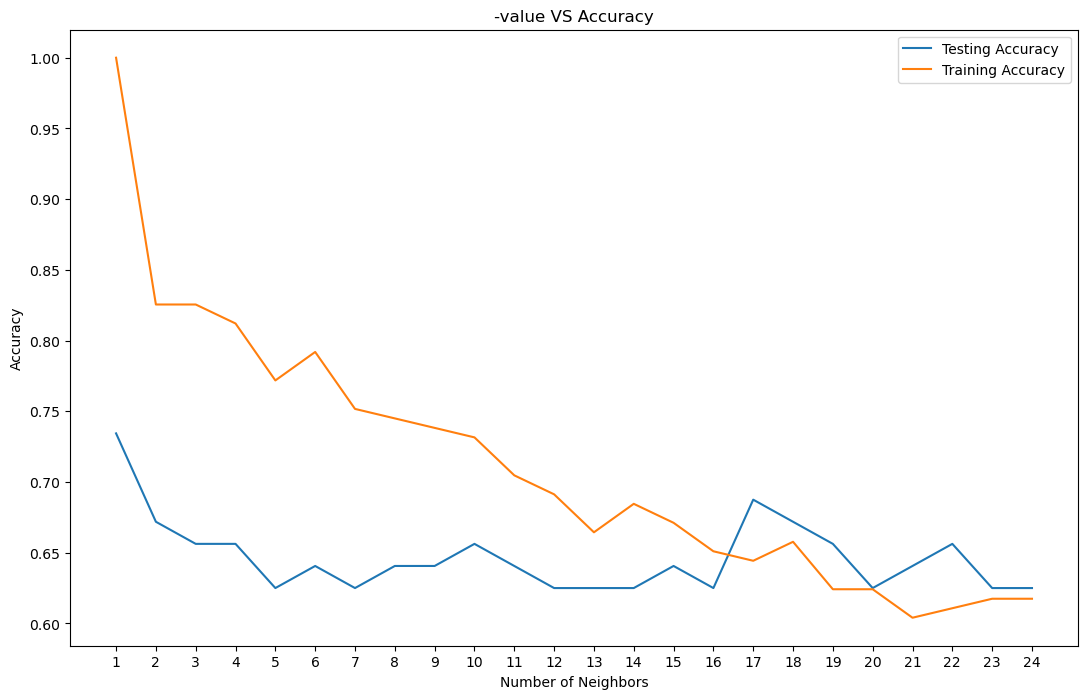

Best accuracy is 0.734375 with K = 1


In [59]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

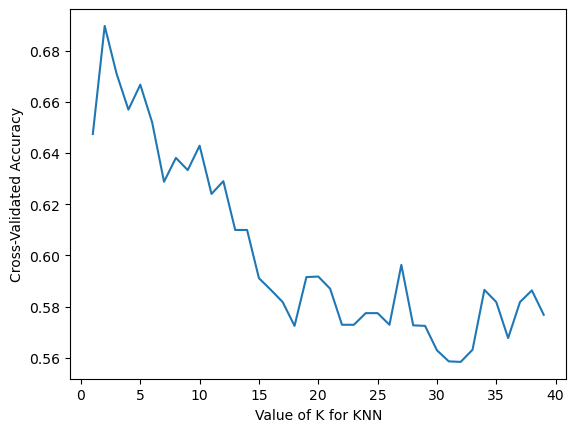

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()